In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/val.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: val/Holo/psp08_04_01_mosaic_197_origins_holo.png  
  inflating: val/Holo/psp08_04_01_mosaic_197_origins_holo_offse1.png  
  inflating: val/Holo/psp08_04_01_mosaic_197_origins_holo_offse2.png  
  inflating: val/Holo/psp08_04_01_mosaic_197_origins_holo_offse3.png  
  inflating: val/Holo/psp08_04_01_mosaic_197_origins_holo_offse4.png  
  inflating: val/Holo/psp08_04_01_mosaic_208_origins_holo_offse2.png  
  inflating: val/Holo/psp08_04_01_mosaic_208_origins_holo_offse3.png  
  inflating: val/Holo/psp08_04_01_mosaic_209_origins_holo.png  
  inflating: val/Holo/psp08_04_01_mosaic_209_origins_holo_offse1.png  
  inflating: val/Holo/psp08_04_01_mosaic_209_origins_holo_offse2.png  
  inflating: val/Holo/psp08_04_01_mosaic_209_origins_holo_offse3.png  
  inflating: val/Holo/psp08_04_01_mosaic_209_origins_holo_offse4.png  
  inflating: val/Holo/psp08_04_01_mosaic_211_origins_holo_offse1.png  
  inflating: 

In [ ]:
import os
import zipfile

# Chemin du dossier contenant les fichiers ZIP
folder_path = '/content/drive/MyDrive/dataset/inference'

# Parcourir tous les fichiers dans le dossier
for filename in os.listdir(folder_path):
    if filename.endswith('.zip'):
        file_path = os.path.join(folder_path, filename)
        print(f'Décompression de {file_path}...')

        # Créer un dossier pour extraire les fichiers
        extract_folder = os.path.join(folder_path, filename[:-4])  # Supprime l'extension .zip
        os.makedirs(extract_folder, exist_ok=True)

        # Décompresser le fichier ZIP
        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_folder)

print('Décompression terminée.')


Décompression de /content/drive/MyDrive/dataset/inference/origins.zip...
Décompression de /content/drive/MyDrive/dataset/inference/copy_without_holo.zip...
Décompression terminée.


## Validation calcul seuil

## ORGINS

In [2]:
!unzip /content/validation.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: validation/origins/psp10_05_03/psp10_05_03_mosaic_206_origins_holo.png  
  inflating: validation/origins/psp10_05_03/psp10_05_03_mosaic_207_origins_holo.png  
  inflating: validation/origins/psp10_05_03/psp10_05_03_mosaic_208_origins_holo.png  
  inflating: validation/origins/psp10_05_03/psp10_05_03_mosaic_209_origins_holo.png  
  inflating: validation/origins/psp10_05_03/psp10_05_03_mosaic_20_origins_holo.png  
  inflating: validation/origins/psp10_05_03/psp10_05_03_mosaic_210_origins_holo.png  
  inflating: validation/origins/psp10_05_03/psp10_05_03_mosaic_211_origins_holo.png  
  inflating: validation/origins/psp10_05_03/psp10_05_03_mosaic_212_origins_holo.png  
  inflating: validation/origins/psp10_05_03/psp10_05_03_mosaic_213_origins_holo.png  
  inflating: validation/origins/psp10_05_03/psp10_05_03_mosaic_214_origins_holo.png  
  inflating: validation/origins/psp10_05_03/psp10_05_03_mosaic_

In [3]:
!unzip /content/test.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: test/photo_holo_copy/psp03_03_01/psp03_03_01_mosaic_205_fraud_photo_holo_copy.png  
  inflating: test/photo_holo_copy/psp03_03_01/psp03_03_01_mosaic_206_fraud_photo_holo_copy.png  
  inflating: test/photo_holo_copy/psp03_03_01/psp03_03_01_mosaic_207_fraud_photo_holo_copy.png  
  inflating: test/photo_holo_copy/psp03_03_01/psp03_03_01_mosaic_208_fraud_photo_holo_copy.png  
  inflating: test/photo_holo_copy/psp03_03_01/psp03_03_01_mosaic_209_fraud_photo_holo_copy.png  
  inflating: test/photo_holo_copy/psp03_03_01/psp03_03_01_mosaic_20_fraud_photo_holo_copy.png  
  inflating: test/photo_holo_copy/psp03_03_01/psp03_03_01_mosaic_210_fraud_photo_holo_copy.png  
  inflating: test/photo_holo_copy/psp03_03_01/psp03_03_01_mosaic_211_fraud_photo_holo_copy.png  
  inflating: test/photo_holo_copy/psp03_03_01/psp03_03_01_mosaic_212_fraud_photo_holo_copy.png  
  inflating: test/photo_holo_copy/psp03_03_01/psp0

In [1]:
# Liste pour stocker les heatmaps
heatmaps_origins = []
heatmaps_copy_without_holo = []
heatmaps_photo_holo_copy = []
heatmaps_pseudo_holo_copy = []
all_nb_holo_origins = []
all_nb_holo_fraud = []

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import re
import tensorflow as tf  

# Chemin du dossier contenant les fichiers 
base_folder_path = '/content/validation/origins/'  # Chemin de base

# Fonction pour charger et prétraiter une image
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Ajouter une dimension pour le batch
    img_array /= 255.0  # Normaliser l'image
    return img_array

# Fonction de tri pour les fichiers
def sort_nicely(l):
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanum_key)

# Charger votre modèle
model = tf.keras.models.load_model('/content/best_model.keras')

# Dossiers à traiter
folders_to_process = [f for f in os.listdir(base_folder_path) if os.path.isdir(os.path.join(base_folder_path, f))]
folders_to_process[:8]

for folder in folders_to_process:
    # Répertoire contenant les images à prédire
    images_dir = os.path.join(base_folder_path, folder)

    # Charger et trier les chemins des images
    image_paths = [os.path.join(images_dir, img) for img in os.listdir(images_dir)]
    image_paths = sort_nicely(image_paths)

    # Initialiser un tableau pour stocker les prédictions
    predictions = []

    # Faire des prédictions pour chaque image
    for img_path in image_paths:
        img = load_and_preprocess_image(img_path)
        prediction = model.predict(img)
        predicted_class = 1 if prediction > 0.5 else 0  # 1 pour Holo, 0 pour No Holo
        predictions.append(predicted_class)

    # Convertir les prédictions en tableau numpy
    predictions = np.array(predictions)

    # Compter le nombre de Holo et No_Holo
    nb_holo = np.sum(predictions == 1)  # Holo
    nb_no_holo = np.sum(predictions == 0)  # No_Holo
    all_nb_holo_origins.append(nb_holo)
    # Reshape pour créer une matrice de 15x20 (15 lignes et 20 colonnes)
    heatmap_data = predictions.reshape((15, 20))

    # Stocker la heatmap dans la liste
    heatmaps_origins.append((heatmap_data, nb_holo, nb_no_holo))


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

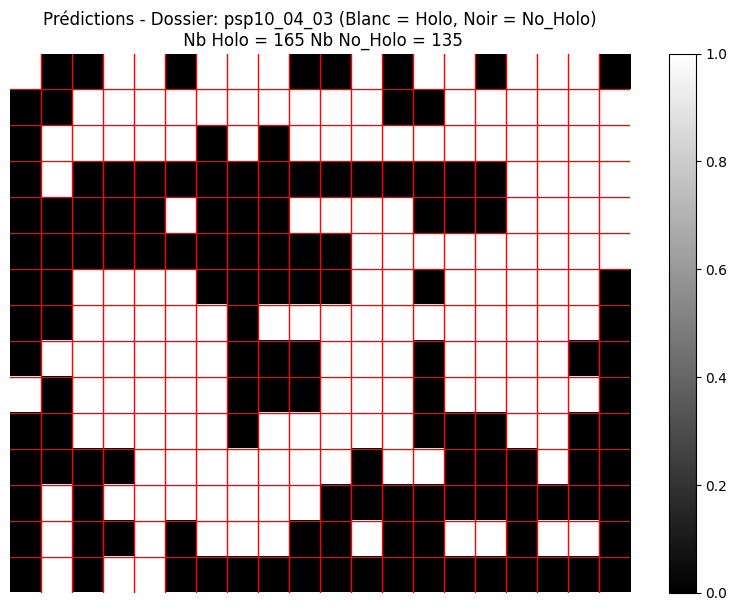

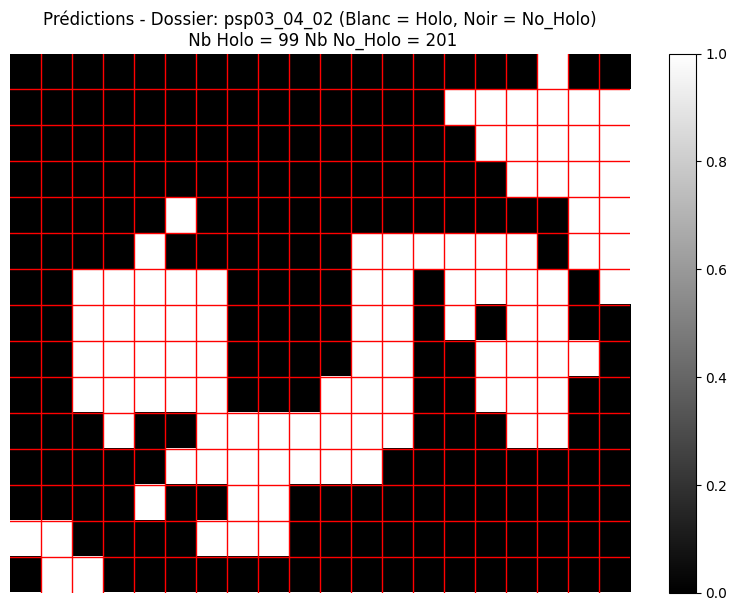

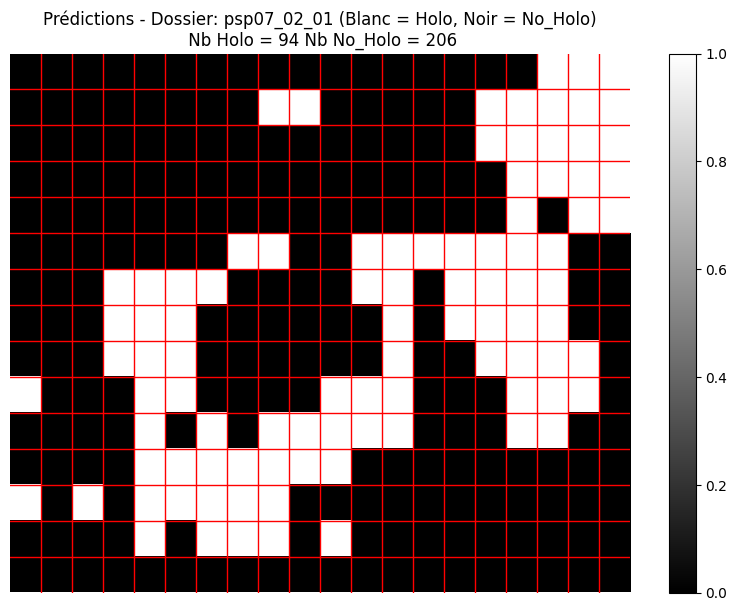

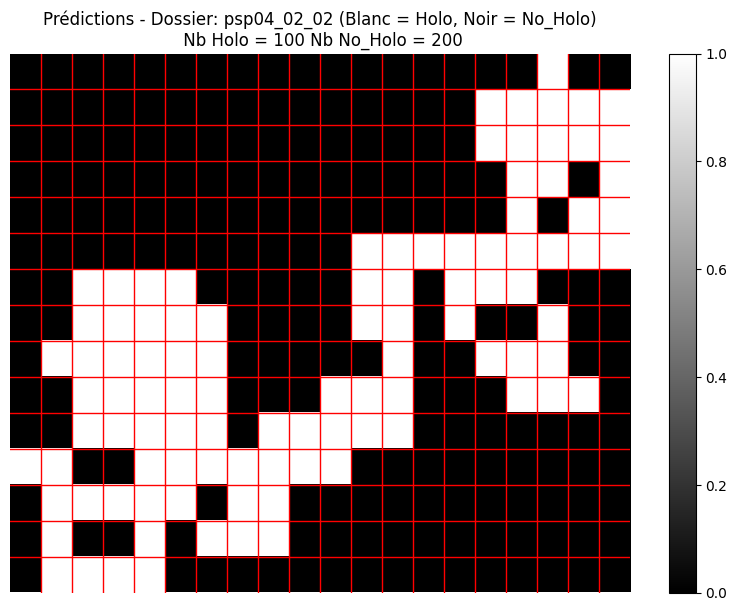

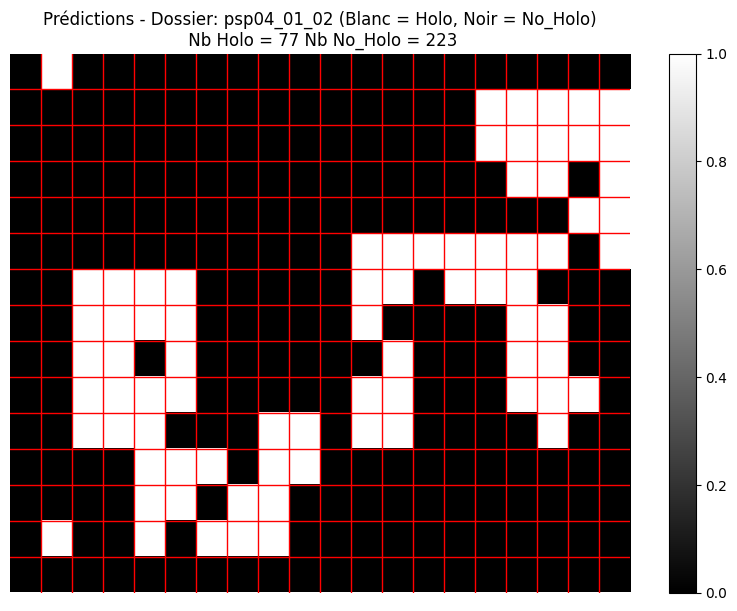

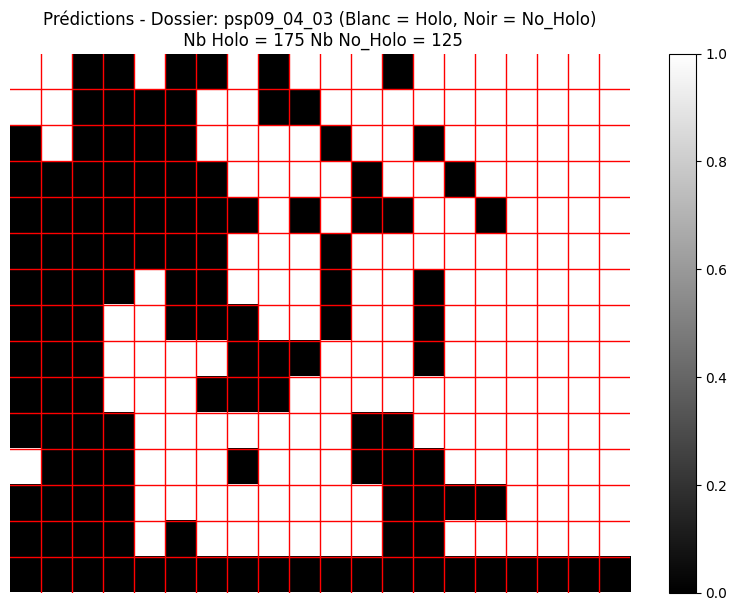

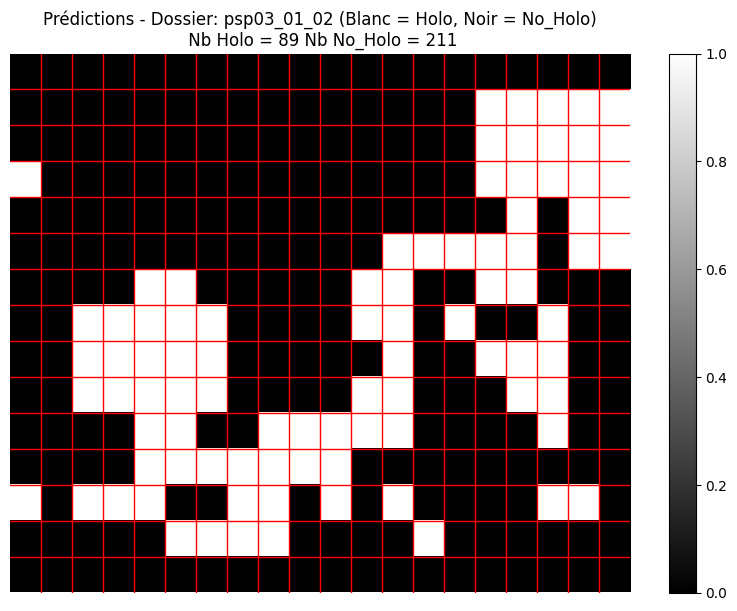

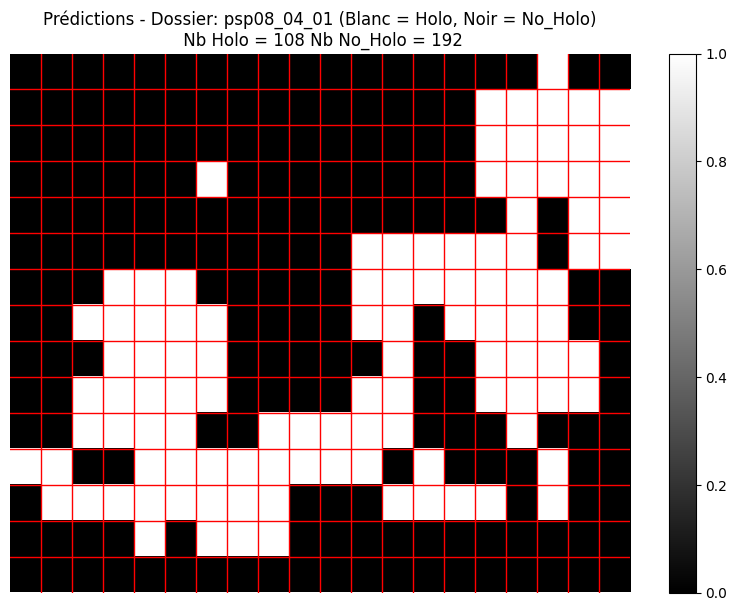

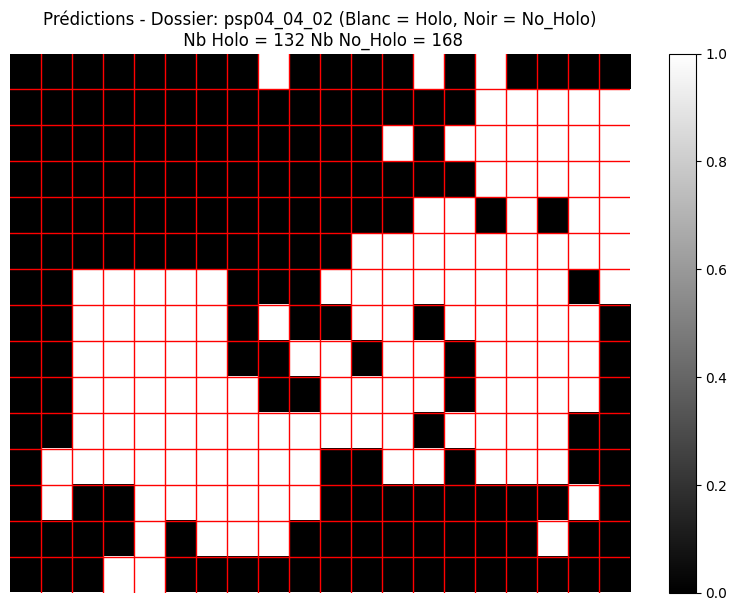

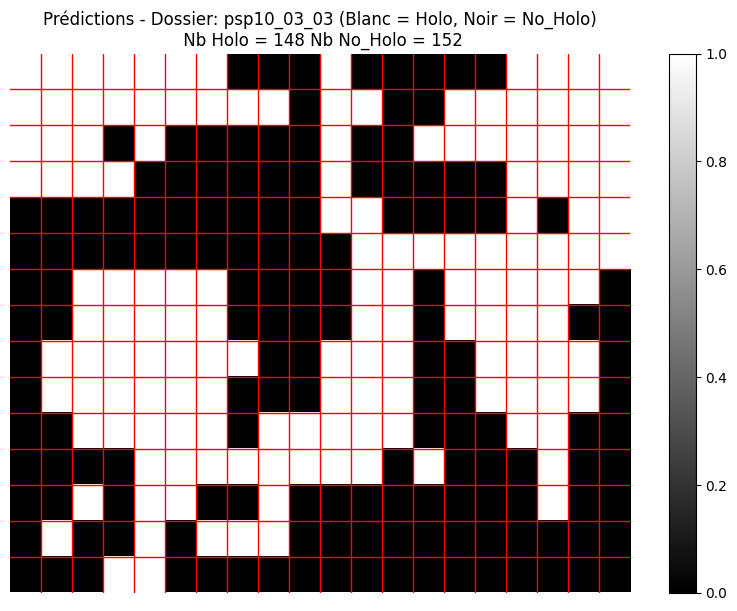

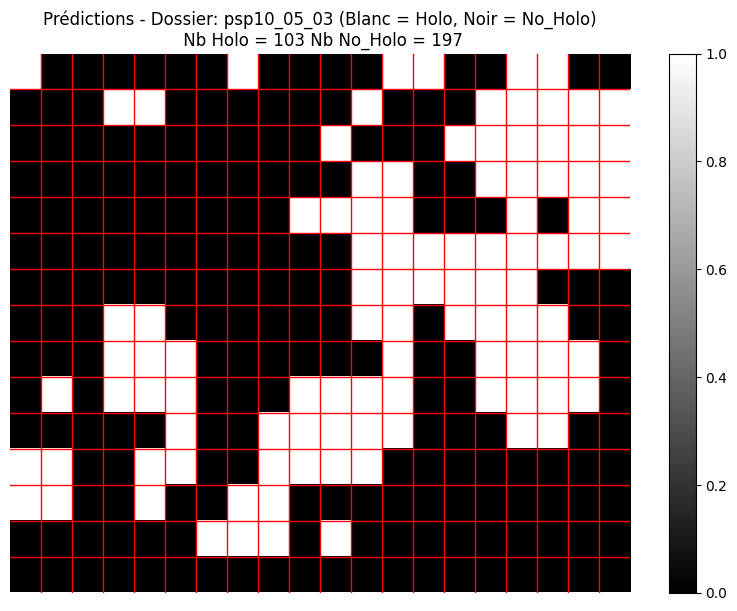

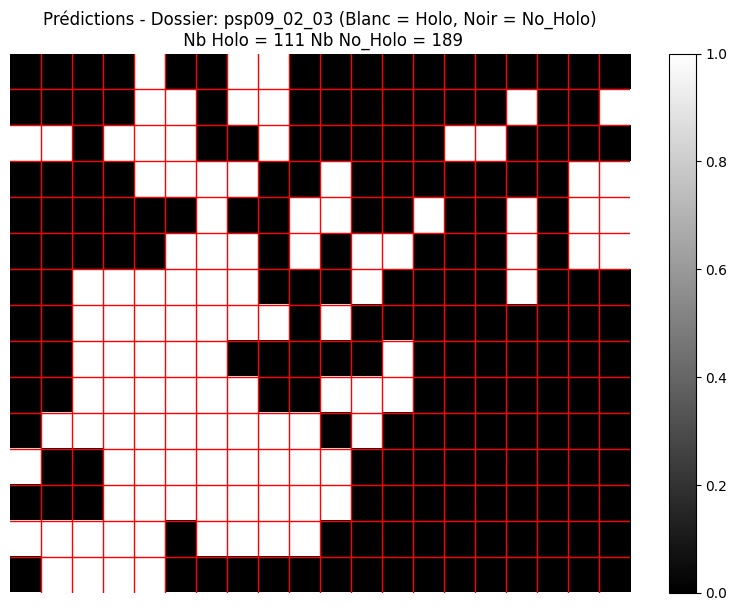

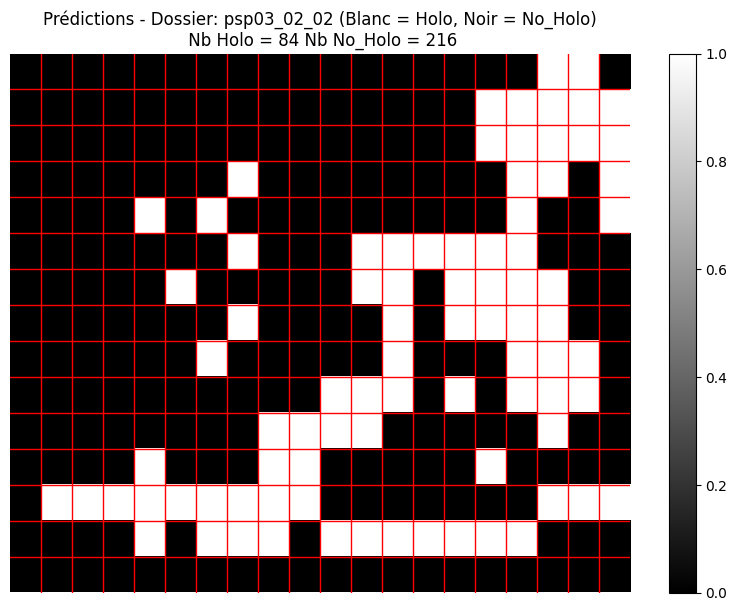

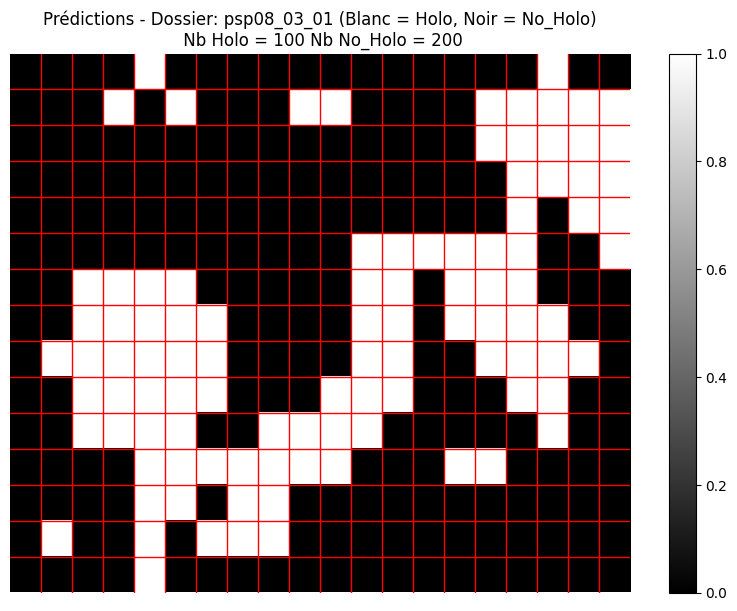

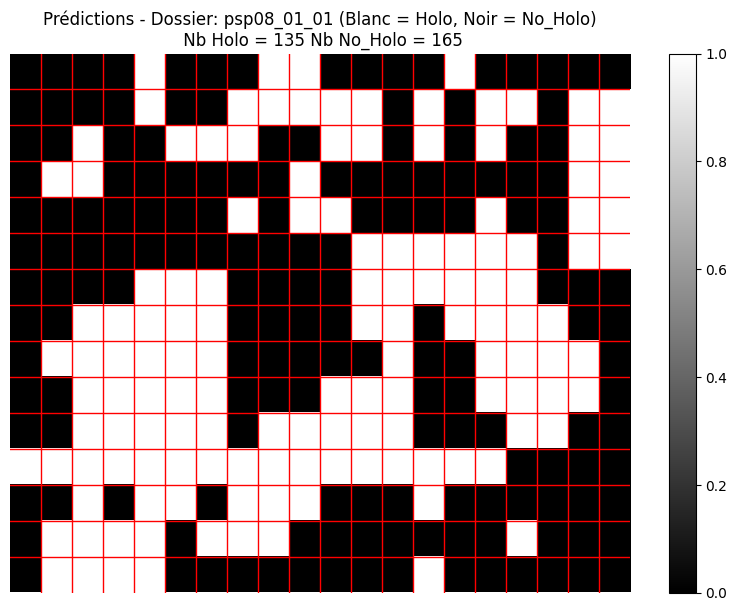

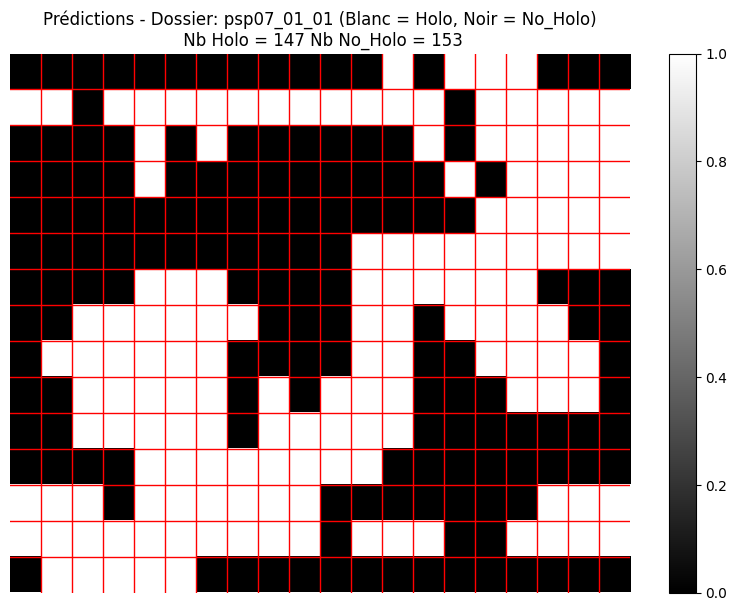

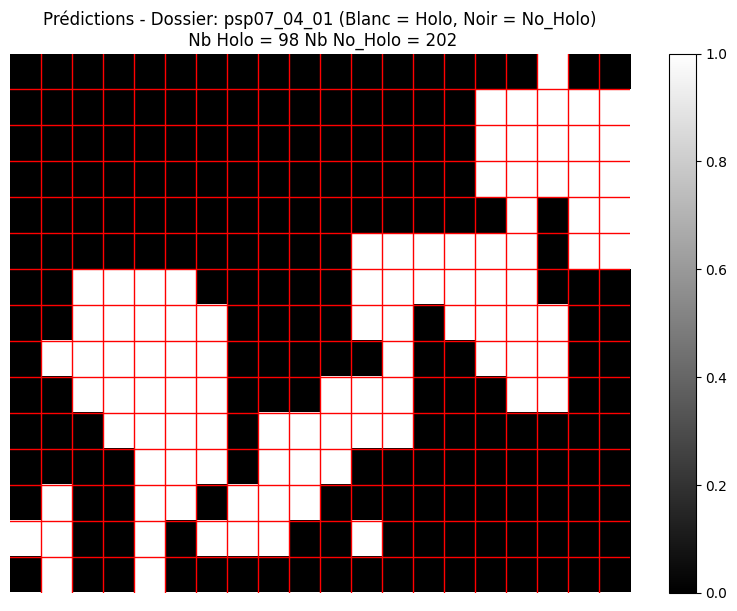

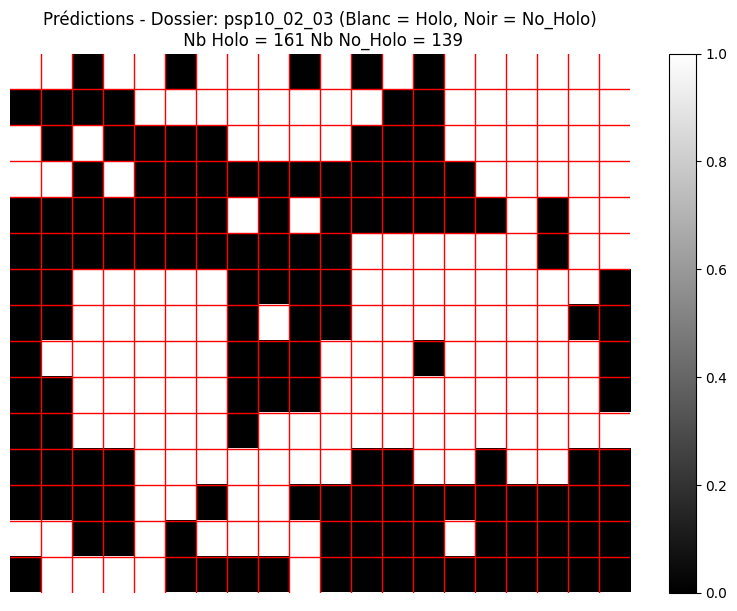

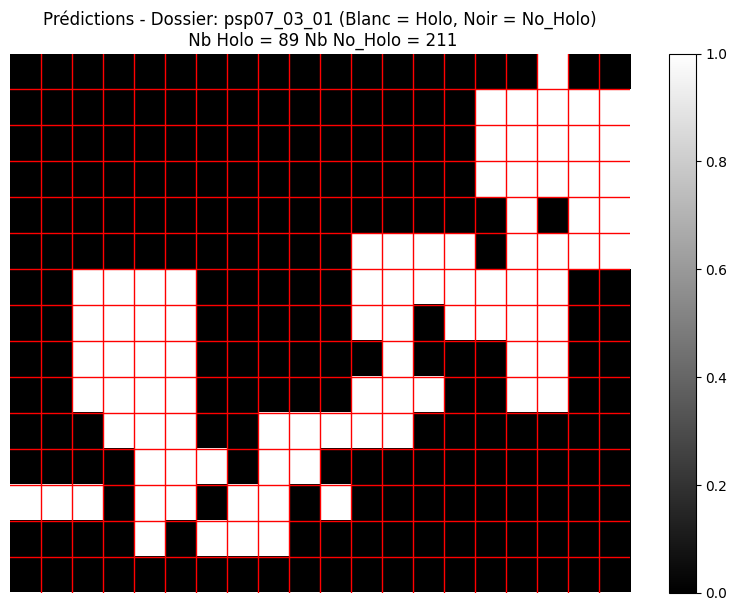

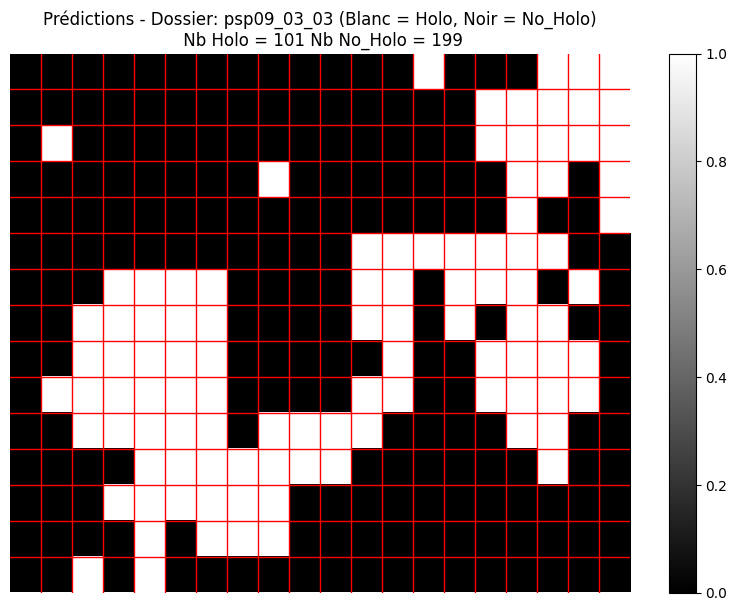

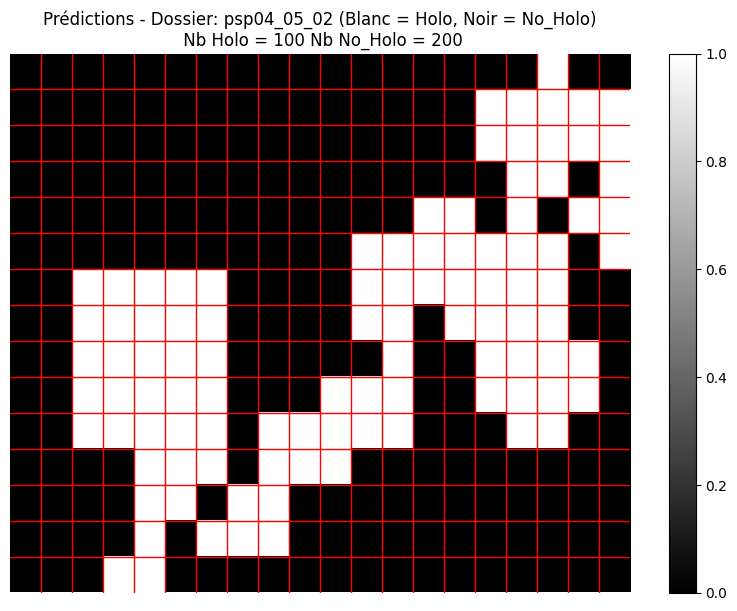

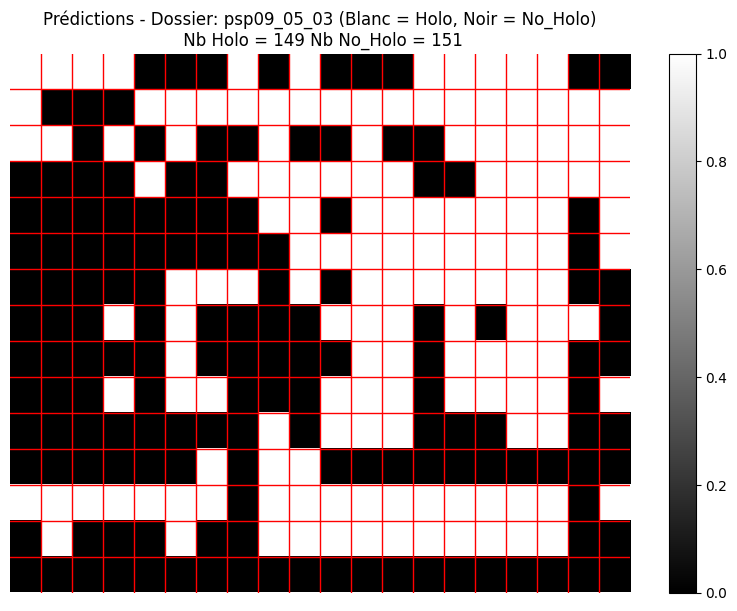

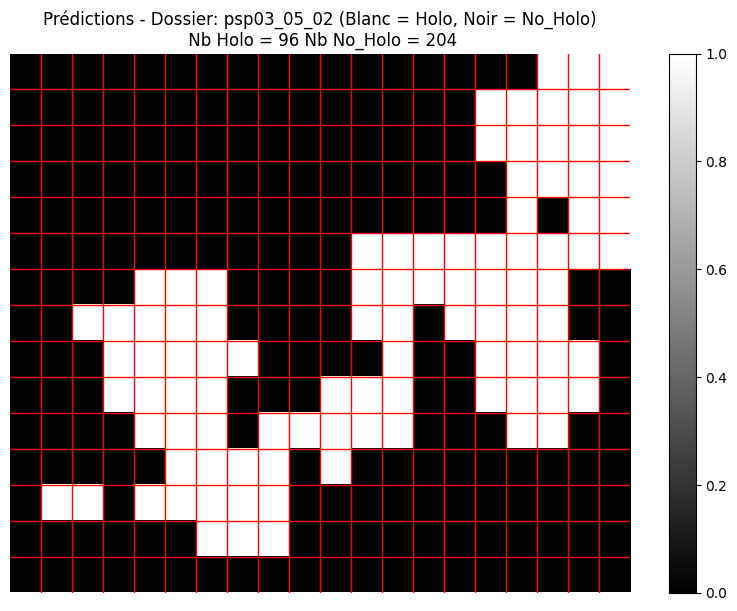

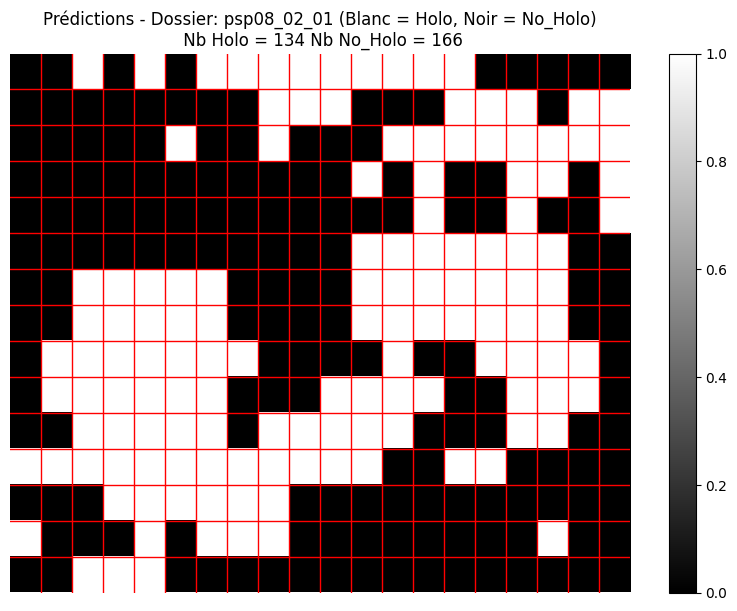

In [6]:
# Afficher toutes les heatmaps
for i, (heatmap_data, nb_holo, nb_no_holo) in enumerate(heatmaps_origins):
    plt.figure(figsize=(10, 7))  # Ajustez la taille de la figure si nécessaire
    plt.imshow(heatmap_data, cmap='binary_r', aspect='auto', vmin=0, vmax=1)

    # Ajouter des lignes rouges pour séparer les cases
    num_rows, num_cols = heatmap_data.shape
    for r in range(1, num_rows):
        plt.axhline(y=r - 0.5, color='red', linewidth=1)
    for c in range(1, num_cols):
        plt.axvline(x=c - 0.5, color='red', linewidth=1)

    plt.colorbar()
    plt.title(f'Prédictions - Dossier: {folders_to_process[i]} (Blanc = Holo, Noir = No_Holo)\n Nb Holo = {nb_holo} Nb No_Holo = {nb_no_holo}')
    plt.axis('off')
    plt.show()


In [7]:
print(all_nb_holo_origins)

[165, 99, 94, 100, 77, 175, 89, 108, 132, 148, 103, 111, 84, 100, 135, 147, 98, 161, 89, 101, 100, 149, 96, 134]


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import re
import tensorflow as tf  # Assurez-vous d'importer tensorflow si ce n'est pas déjà fait

# Chemin du dossier contenant les fichiers ZIP
base_folder_path = '/content/validation/origins/'  # Chemin de base

# Fonction pour charger et prétraiter une image
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Ajouter une dimension pour le batch
    img_array /= 255.0  # Normaliser l'image
    return img_array

# Fonction de tri personnalisé pour les fichiers
def sort_nicely(l):
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanum_key)

# Charger votre modèle
model = tf.keras.models.load_model('/content/best_model.keras')

# Dossiers à traiter
folders_to_process[8:16]

for folder in folders_to_process:
    # Répertoire contenant les images à prédire
    images_dir = os.path.join(base_folder_path, folder)

    # Charger et trier les chemins des images
    image_paths = [os.path.join(images_dir, img) for img in os.listdir(images_dir)]
    image_paths = sort_nicely(image_paths)

    # Initialiser un tableau pour stocker les prédictions
    predictions = []

    # Faire des prédictions pour chaque image
    for img_path in image_paths:
        img = load_and_preprocess_image(img_path)
        prediction = model.predict(img)
        predicted_class = 1 if prediction > 0.5 else 0  # 1 pour No_Holo, 0 pour Holo
        predictions.append(predicted_class)

    # Convertir les prédictions en tableau numpy
    predictions = np.array(predictions)

    # Compter le nombre de Holo et No_Holo
    nb_holo = np.sum(predictions == 1)  # Holo
    nb_no_holo = np.sum(predictions == 0)  # No_Holo
    all_nb_holo_origins.append(nb_holo)
    # Reshape pour créer une matrice de 15x20 (15 lignes et 20 colonnes)
    heatmap_data = predictions.reshape((15, 20))

    # Stocker la heatmap dans la liste
    heatmaps_origins.append((heatmap_data, nb_holo, nb_no_holo))


In [ ]:
# Afficher toutes les heatmaps
for i, (heatmap_data, nb_holo, nb_no_holo) in enumerate(heatmaps_origins):
    plt.figure(figsize=(10, 7))  # Ajustez la taille de la figure si nécessaire
    plt.imshow(heatmap_data, cmap='binary_r', aspect='auto', vmin=0, vmax=1)

    # Ajouter des lignes rouges pour séparer les cases
    num_rows, num_cols = heatmap_data.shape
    for r in range(1, num_rows):
        plt.axhline(y=r - 0.5, color='red', linewidth=1)
    for c in range(1, num_cols):
        plt.axvline(x=c - 0.5, color='red', linewidth=1)

    plt.colorbar()
    plt.title(f'Prédictions - Dossier: {folders_to_process[i]} (Blanc = Holo, Noir = No_Holo)\n Nb Holo = {nb_holo} Nb No_Holo = {nb_no_holo}')
    plt.axis('off')
    plt.show()


In [ ]:
print(all_nb_holo_origins)

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import re
import tensorflow as tf  # Assurez-vous d'importer tensorflow si ce n'est pas déjà fait

# Chemin du dossier contenant les fichiers ZIP
base_folder_path = '/content/validation/origins/'  # Chemin de base

# Fonction pour charger et prétraiter une image
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Ajouter une dimension pour le batch
    img_array /= 255.0  # Normaliser l'image
    return img_array

# Fonction de tri personnalisé pour les fichiers
def sort_nicely(l):
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanum_key)

# Charger votre modèle
model = tf.keras.models.load_model('/content/best_model.keras')

# Dossiers à traiter
folders_to_process[16:]

for folder in folders_to_process:
    # Répertoire contenant les images à prédire
    images_dir = os.path.join(base_folder_path, folder)

    # Charger et trier les chemins des images
    image_paths = [os.path.join(images_dir, img) for img in os.listdir(images_dir)]
    image_paths = sort_nicely(image_paths)

    # Initialiser un tableau pour stocker les prédictions
    predictions = []

    # Faire des prédictions pour chaque image
    for img_path in image_paths:
        img = load_and_preprocess_image(img_path)
        prediction = model.predict(img)
        predicted_class = 1 if prediction > 0.5 else 0  # 1 pour No_Holo, 0 pour Holo
        predictions.append(predicted_class)

    # Convertir les prédictions en tableau numpy
    predictions = np.array(predictions)

    # Compter le nombre de Holo et No_Holo
    nb_holo = np.sum(predictions == 1)  # Holo
    nb_no_holo = np.sum(predictions == 0)  # No_Holo
    all_nb_holo_origins.append(nb_holo)
    # Reshape pour créer une matrice de 15x20 (15 lignes et 20 colonnes)
    heatmap_data = predictions.reshape((15, 20))

    # Stocker la heatmap dans la liste
    heatmaps_origins.append((heatmap_data, nb_holo, nb_no_holo))


In [ ]:
# Afficher toutes les heatmaps
for i, (heatmap_data, nb_holo, nb_no_holo) in enumerate(heatmaps_origins):
    plt.figure(figsize=(10, 7))  # Ajustez la taille de la figure si nécessaire
    plt.imshow(heatmap_data, cmap='binary_r', aspect='auto', vmin=0, vmax=1)

    # Ajouter des lignes rouges pour séparer les cases
    num_rows, num_cols = heatmap_data.shape
    for r in range(1, num_rows):
        plt.axhline(y=r - 0.5, color='red', linewidth=1)
    for c in range(1, num_cols):
        plt.axvline(x=c - 0.5, color='red', linewidth=1)

    plt.colorbar()
    plt.title(f'Prédictions - Dossier: {folders_to_process[i]} (Blanc = Holo, Noir = No_Holo)\n Nb Holo = {nb_holo} Nb No_Holo = {nb_no_holo}')
    plt.axis('off')
    plt.show()


In [ ]:
print(all_nb_holo_origins)

## FRAUD

## Copy Without Holo

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import re
import tensorflow as tf  # Assurez-vous d'importer tensorflow si ce n'est pas déjà fait

# Chemin du dossier contenant les fichiers ZIP
base_folder_path = '/content/validation/copy_without_holo'   # Chemin de base

# Fonction pour charger et prétraiter une image
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Ajouter une dimension pour le batch
    img_array /= 255.0  # Normaliser l'image
    return img_array

# Fonction de tri personnalisé pour les fichiers
def sort_nicely(l):
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanum_key)

# Charger votre modèle
model = tf.keras.models.load_model('/content/best_model.keras')

# Dossiers à traiter
folders_to_process = [f for f in os.listdir(base_folder_path) if os.path.isdir(os.path.join(base_folder_path, f))]

for folder in folders_to_process:
    # Répertoire contenant les images à prédire
    images_dir = os.path.join(base_folder_path, folder)

    # Charger et trier les chemins des images
    image_paths = [os.path.join(images_dir, img) for img in os.listdir(images_dir)]
    image_paths = sort_nicely(image_paths)

    # Initialiser un tableau pour stocker les prédictions
    predictions = []

    # Faire des prédictions pour chaque image
    for img_path in image_paths:
        img = load_and_preprocess_image(img_path)
        prediction = model.predict(img)
        predicted_class = 1 if prediction > 0.5 else 0  # 1 pour Holo, 0 pour No_Holo
        predictions.append(predicted_class)

    # Convertir les prédictions en tableau numpy
    predictions = np.array(predictions)

    # Compter le nombre de Holo et No_Holo
    nb_holo = np.sum(predictions == 1)  # Holo
    nb_no_holo = np.sum(predictions == 0)  # No_Holo
    all_nb_holo_fraud.append(nb_holo)
    # Reshape pour créer une matrice de 15x20 (15 lignes et 20 colonnes)
    heatmap_data = predictions.reshape((15, 20))

    # Stocker la heatmap dans la liste
    heatmaps_copy_without_holo.append((heatmap_data, nb_holo, nb_no_holo))


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 842ms/ste

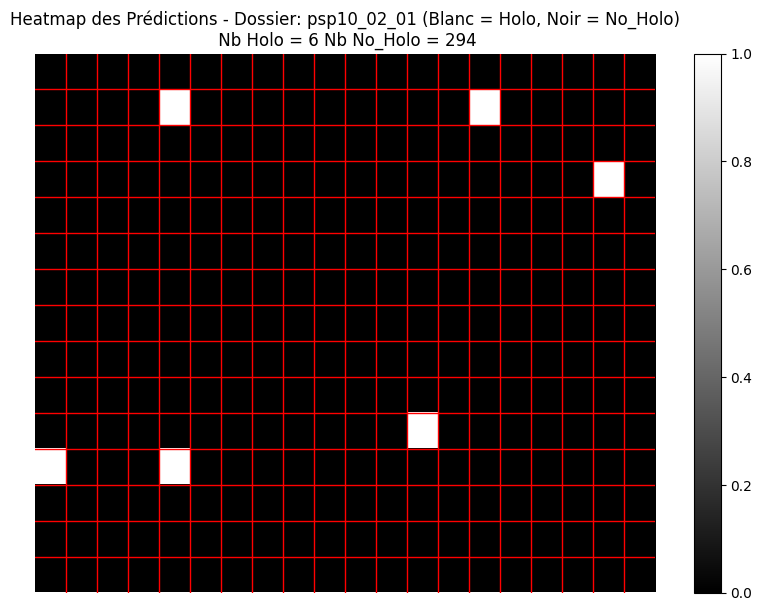

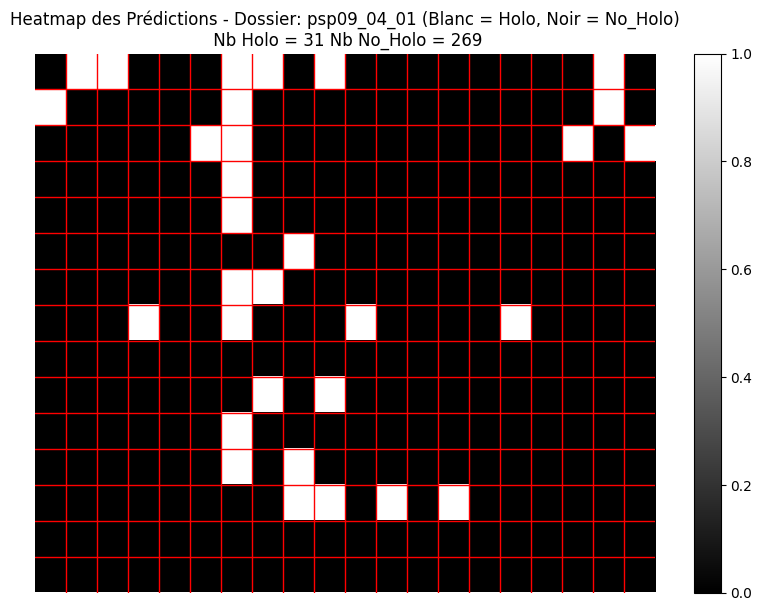

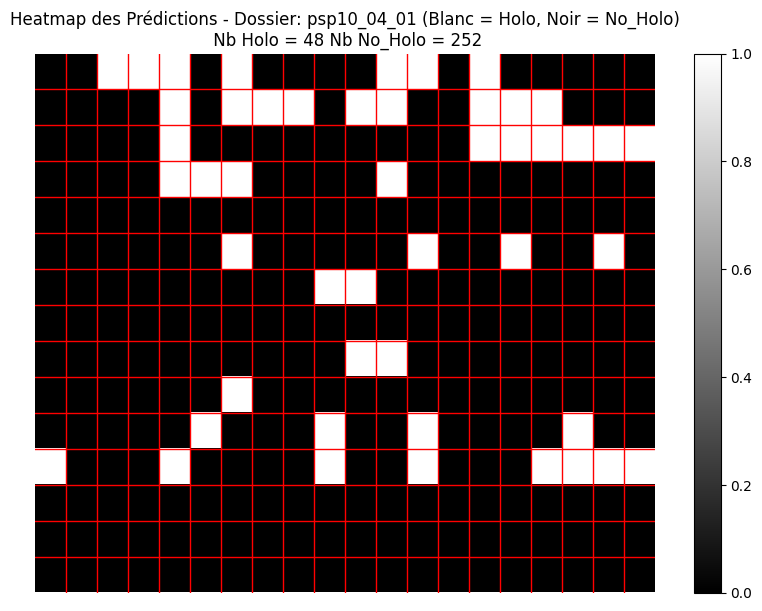

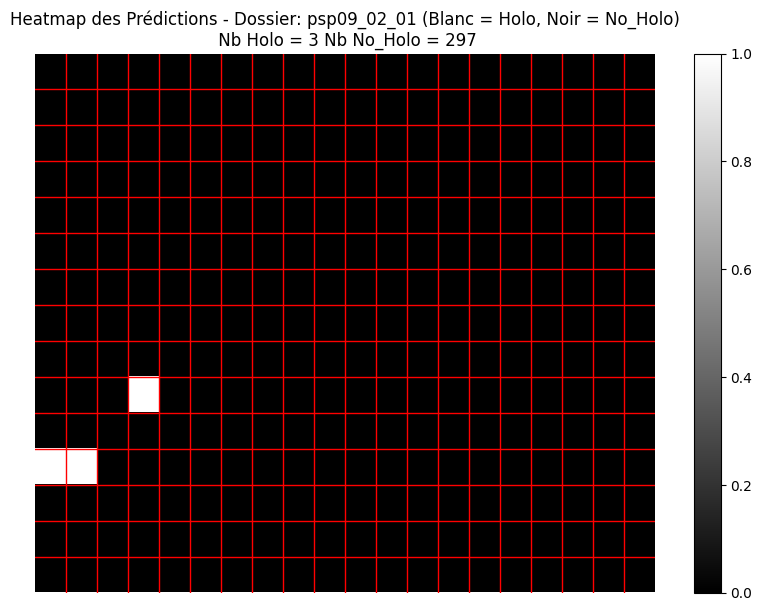

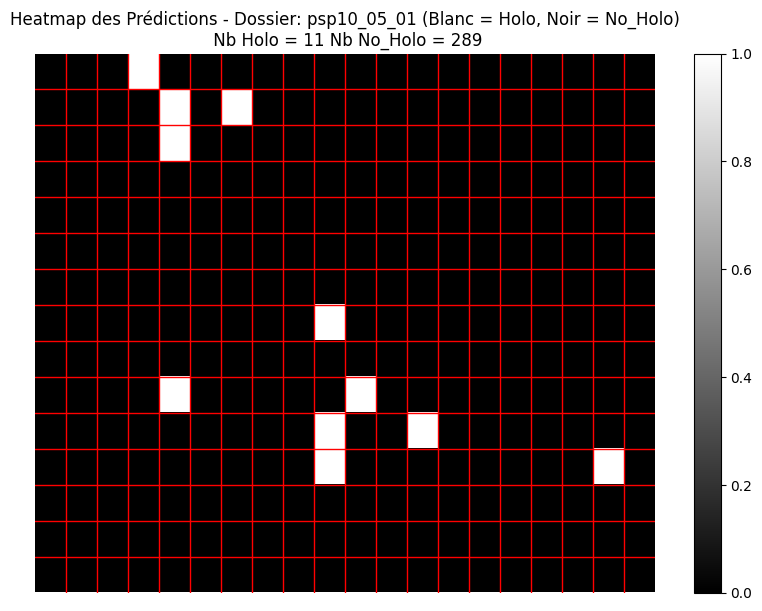

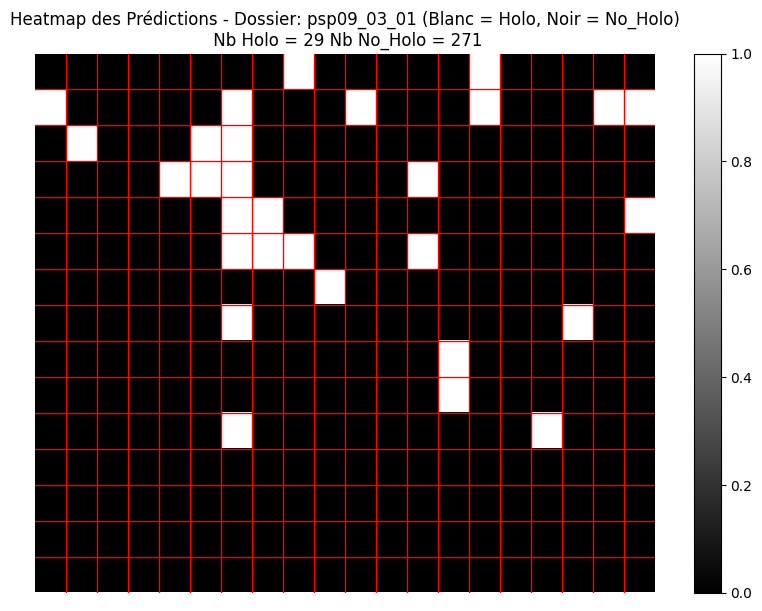

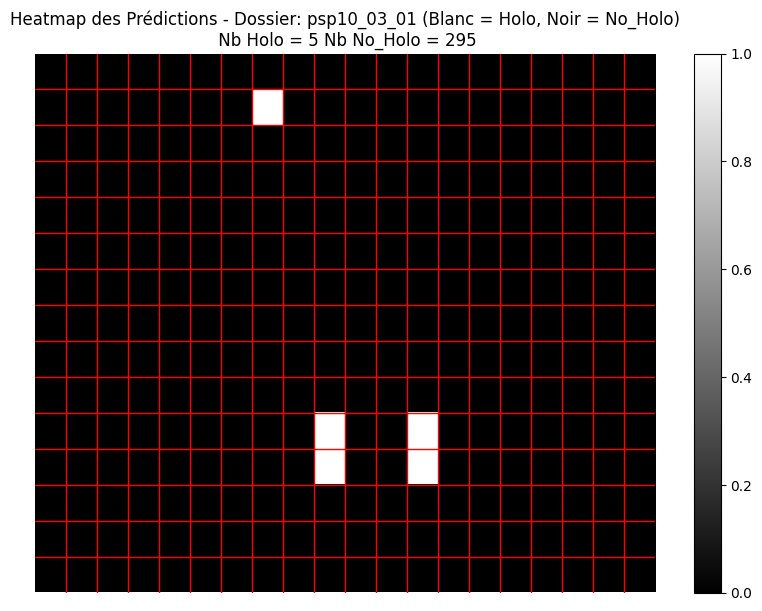

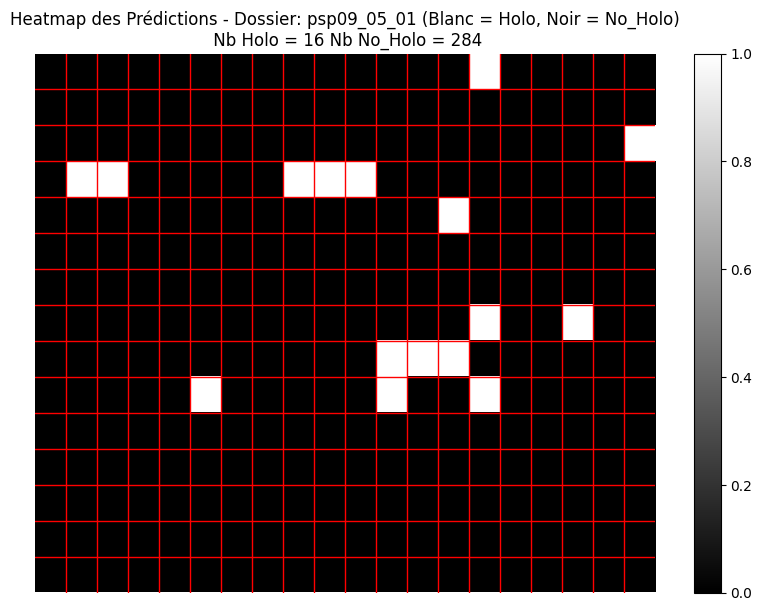

In [9]:
# Afficher toutes les heatmaps
for i, (heatmap_data, nb_holo, nb_no_holo) in enumerate(heatmaps_copy_without_holo):
    plt.figure(figsize=(10, 7))  # Ajustez la taille de la figure si nécessaire
    plt.imshow(heatmap_data, cmap='binary_r', aspect='auto', vmin=0, vmax=1)

    # Ajouter des lignes rouges pour séparer les cases
    num_rows, num_cols = heatmap_data.shape
    for r in range(1, num_rows):
        plt.axhline(y=r - 0.5, color='red', linewidth=1)
    for c in range(1, num_cols):
        plt.axvline(x=c - 0.5, color='red', linewidth=1)

    plt.colorbar()
    plt.title(f'Heatmap des Prédictions - Dossier: {folders_to_process[i]} (Blanc = Holo, Noir = No_Holo)\n Nb Holo = {nb_holo} Nb No_Holo = {nb_no_holo}')
    plt.axis('off')
    plt.show()


In [10]:
print(all_nb_holo_fraud)

[6, 31, 48, 3, 11, 29, 5, 16]


## Photo Holo Copy

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import re
import tensorflow as tf  # Assurez-vous d'importer tensorflow si ce n'est pas déjà fait

# Chemin du dossier contenant les fichiers ZIP
base_folder_path = '/content/validation/photo_holo_copy'   # Chemin de base

# Fonction pour charger et prétraiter une image
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Ajouter une dimension pour le batch
    img_array /= 255.0  # Normaliser l'image
    return img_array

# Fonction de tri personnalisé pour les fichiers
def sort_nicely(l):
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanum_key)

# Charger votre modèle
model = tf.keras.models.load_model('/content/best_model.keras')

# Dossiers à traiter
folders_to_process = [f for f in os.listdir(base_folder_path) if os.path.isdir(os.path.join(base_folder_path, f))]

for folder in folders_to_process:
    # Répertoire contenant les images à prédire
    images_dir = os.path.join(base_folder_path, folder)

    # Charger et trier les chemins des images
    image_paths = [os.path.join(images_dir, img) for img in os.listdir(images_dir)]
    image_paths = sort_nicely(image_paths)

    # Initialiser un tableau pour stocker les prédictions
    predictions = []

    # Faire des prédictions pour chaque image
    for img_path in image_paths:
        img = load_and_preprocess_image(img_path)
        prediction = model.predict(img)
        predicted_class = 1 if prediction > 0.5 else 0  # 1 pour Holo, 0 pour No_Holo
        predictions.append(predicted_class)

    # Convertir les prédictions en tableau numpy
    predictions = np.array(predictions)

    # Compter le nombre de Holo et No_Holo
    nb_holo = np.sum(predictions == 1)  # Holo
    nb_no_holo = np.sum(predictions == 0)  # No_Holo
    all_nb_holo_fraud.append(nb_holo)
    # Reshape pour créer une matrice de 15x20 (15 lignes et 20 colonnes)
    heatmap_data = predictions.reshape((15, 20))

    # Stocker la heatmap dans la liste
    heatmaps_photo_holo_copy.append((heatmap_data, nb_holo, nb_no_holo))


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

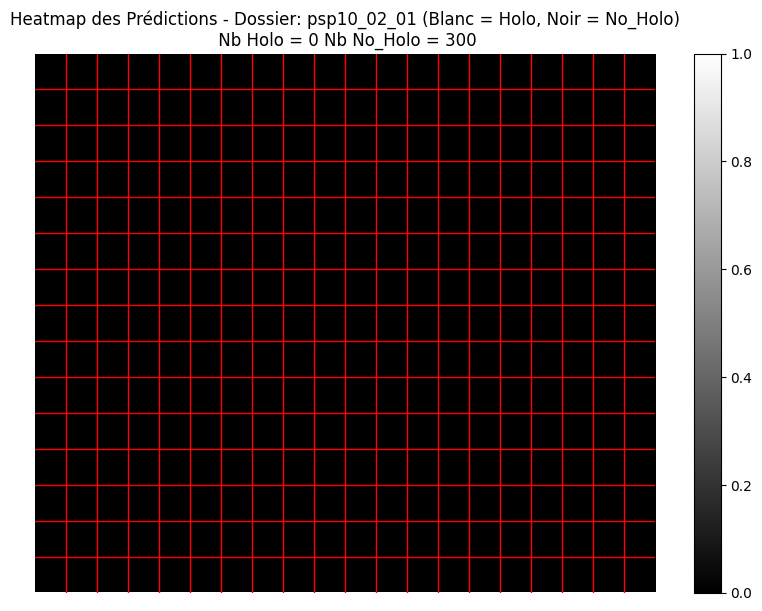

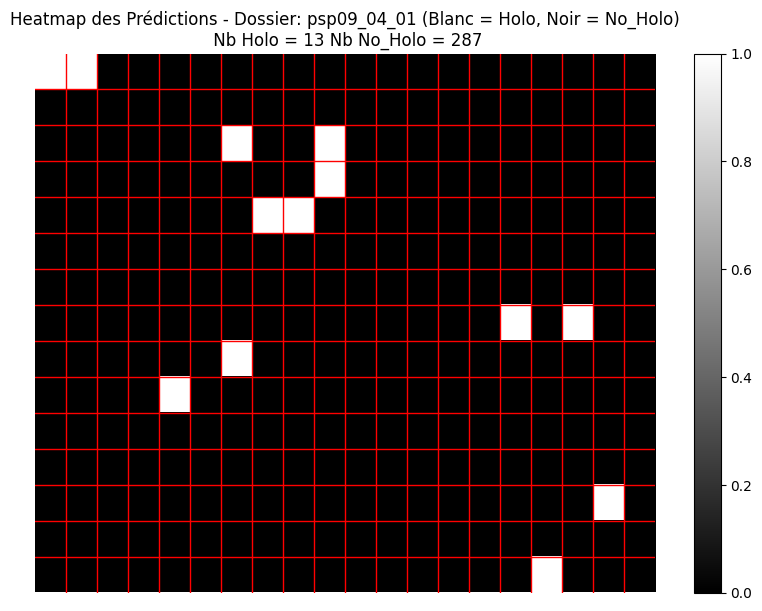

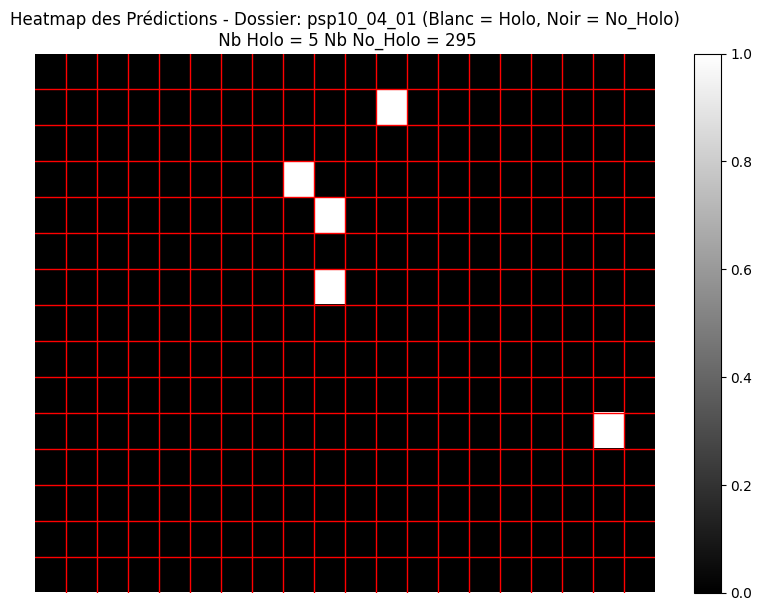

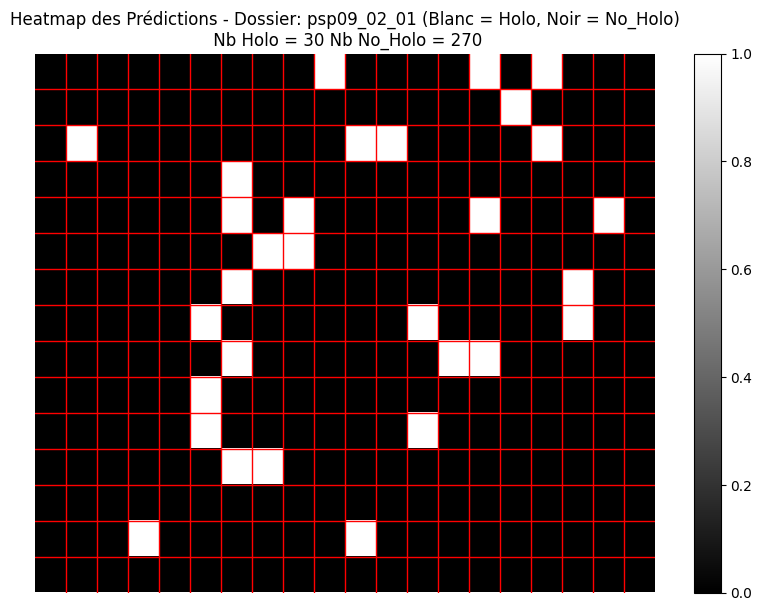

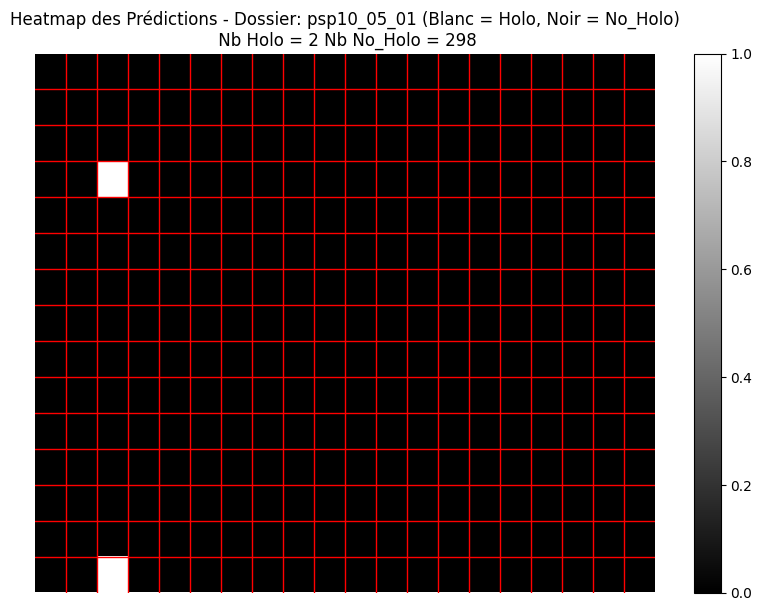

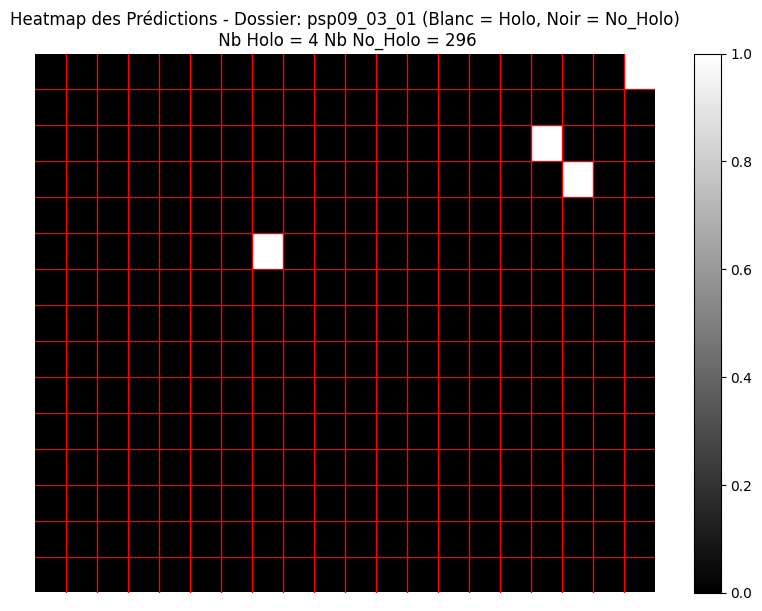

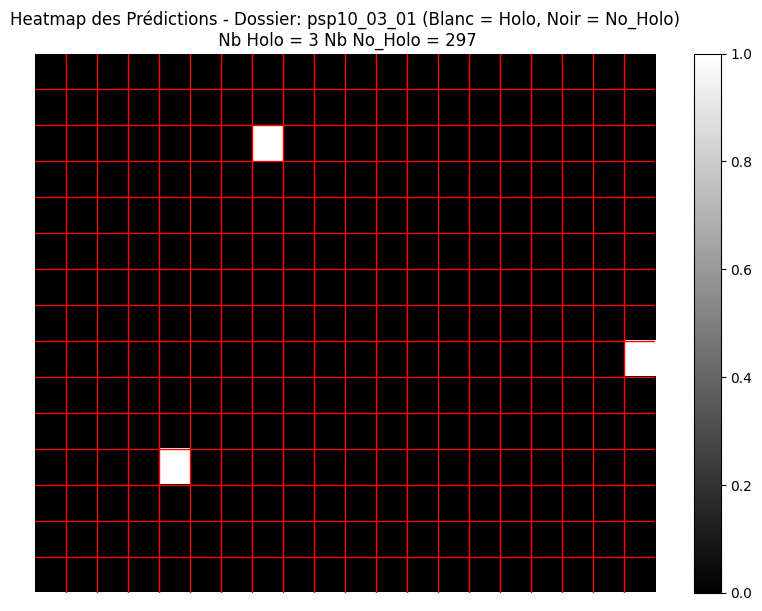

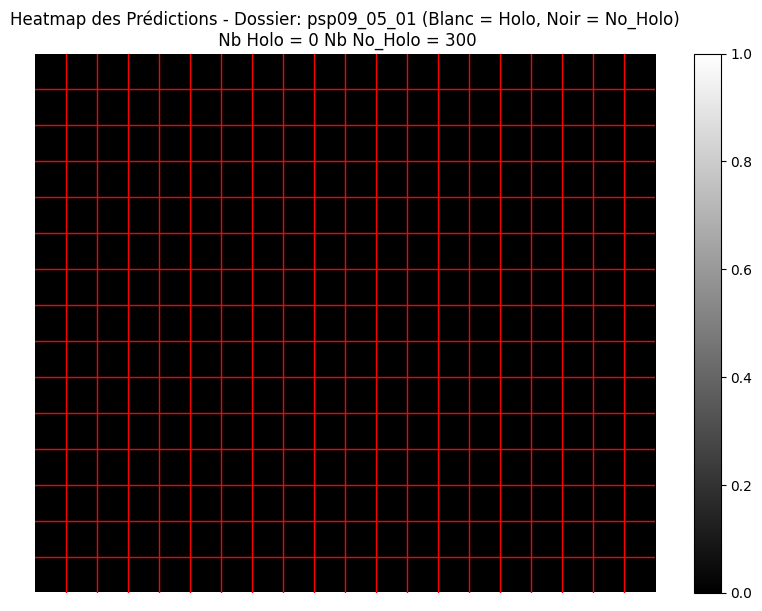

In [12]:
# Afficher toutes les heatmaps
for i, (heatmap_data, nb_holo, nb_no_holo) in enumerate(heatmaps_photo_holo_copy):
    plt.figure(figsize=(10, 7))  # Ajustez la taille de la figure si nécessaire
    plt.imshow(heatmap_data, cmap='binary_r', aspect='auto', vmin=0, vmax=1)

    # Ajouter des lignes rouges pour séparer les cases
    num_rows, num_cols = heatmap_data.shape
    for r in range(1, num_rows):
        plt.axhline(y=r - 0.5, color='red', linewidth=1)
    for c in range(1, num_cols):
        plt.axvline(x=c - 0.5, color='red', linewidth=1)

    plt.colorbar()
    plt.title(f'Heatmap des Prédictions - Dossier: {folders_to_process[i]} (Blanc = Holo, Noir = No_Holo)\n Nb Holo = {nb_holo} Nb No_Holo = {nb_no_holo}')
    plt.axis('off')
    plt.show()


In [13]:
print(all_nb_holo_fraud)

[6, 31, 48, 3, 11, 29, 5, 16, 0, 13, 5, 30, 2, 4, 3, 0]


## Pseudo Holo Copy

In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import re
import tensorflow as tf  # Assurez-vous d'importer tensorflow si ce n'est pas déjà fait

# Chemin du dossier contenant les fichiers ZIP
base_folder_path = '/content/validation/pseudo_holo_copy'   # Chemin de base

# Fonction pour charger et prétraiter une image
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Ajouter une dimension pour le batch
    img_array /= 255.0  # Normaliser l'image
    return img_array

# Fonction de tri personnalisé pour les fichiers
def sort_nicely(l):
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanum_key)

# Charger votre modèle
model = tf.keras.models.load_model('/content/best_model.keras')

# Dossiers à traiter
folders_to_process = [f for f in os.listdir(base_folder_path) if os.path.isdir(os.path.join(base_folder_path, f))]

for folder in folders_to_process:
    # Répertoire contenant les images à prédire
    images_dir = os.path.join(base_folder_path, folder)

    # Charger et trier les chemins des images
    image_paths = [os.path.join(images_dir, img) for img in os.listdir(images_dir)]
    image_paths = sort_nicely(image_paths)

    # Initialiser un tableau pour stocker les prédictions
    predictions = []

    # Faire des prédictions pour chaque image
    for img_path in image_paths:
        img = load_and_preprocess_image(img_path)
        prediction = model.predict(img)
        predicted_class = 1 if prediction > 0.5 else 0  # 1 pour Holo, 0 pour No_Holo
        predictions.append(predicted_class)

    # Convertir les prédictions en tableau numpy
    predictions = np.array(predictions)

    # Compter le nombre de Holo et No_Holo
    nb_holo = np.sum(predictions == 1)  # Holo
    nb_no_holo = np.sum(predictions == 0)  # No_Holo
    all_nb_holo_fraud.append(nb_holo)
    # Reshape pour créer une matrice de 15x20 (15 lignes et 20 colonnes)
    heatmap_data = predictions.reshape((15, 20))

    # Stocker la heatmap dans la liste
    heatmaps_pseudo_holo_copy.append((heatmap_data, nb_holo, nb_no_holo))


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 672ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 692ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

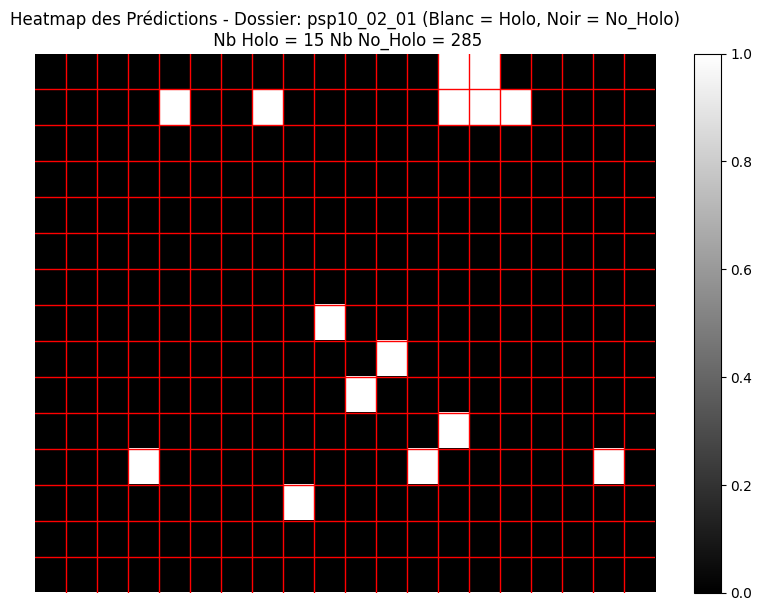

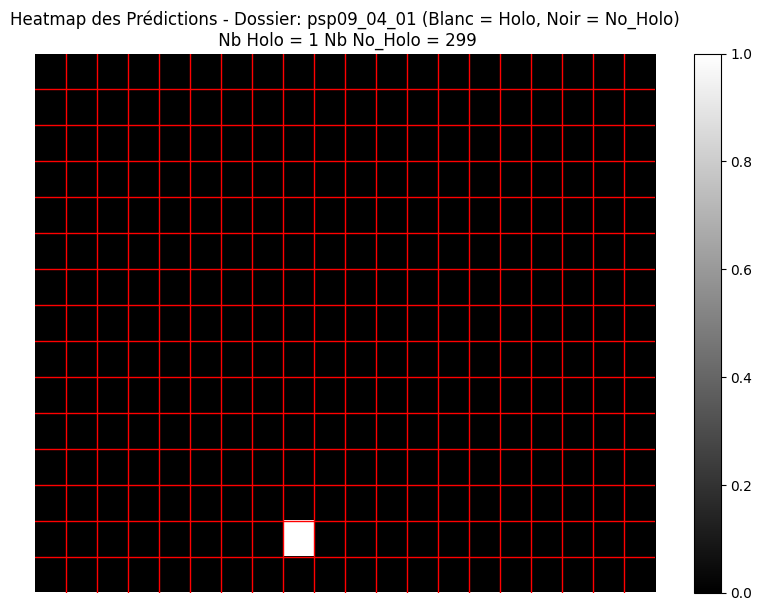

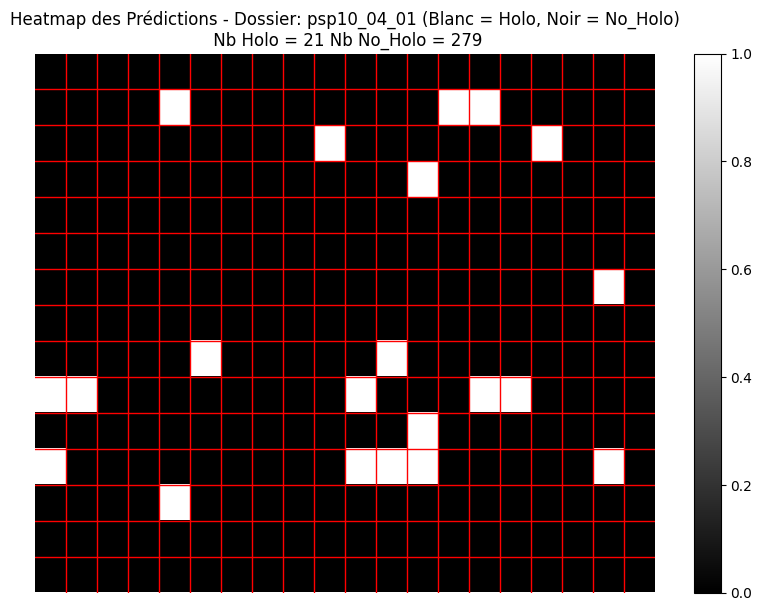

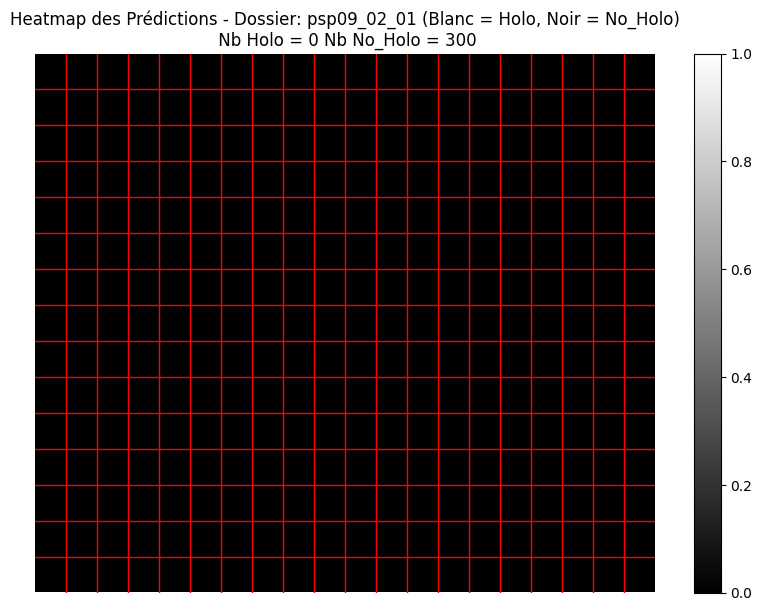

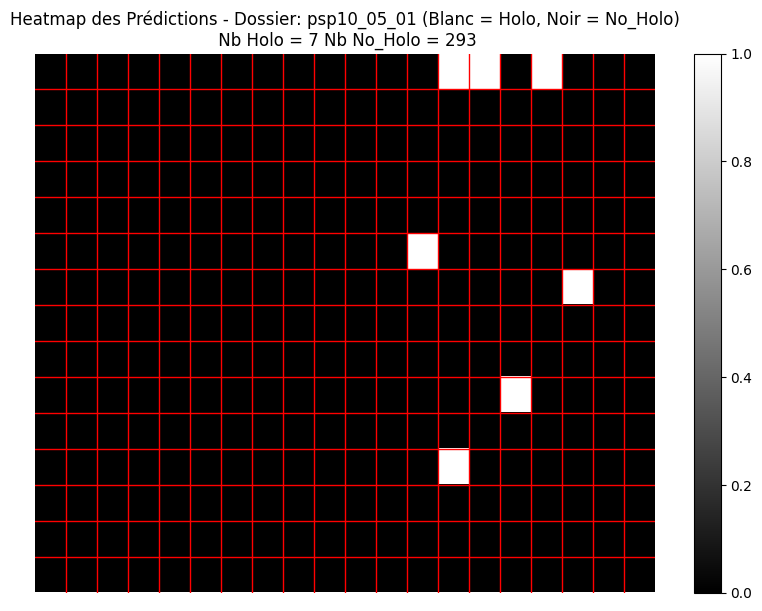

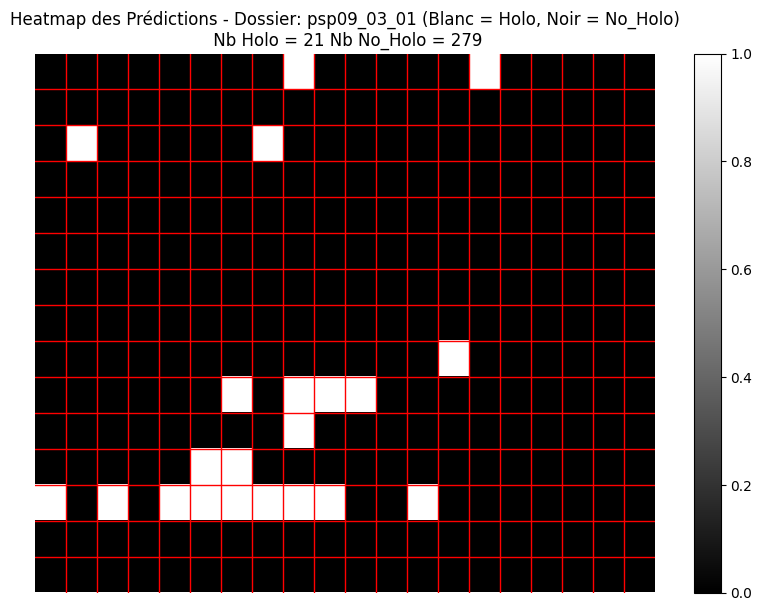

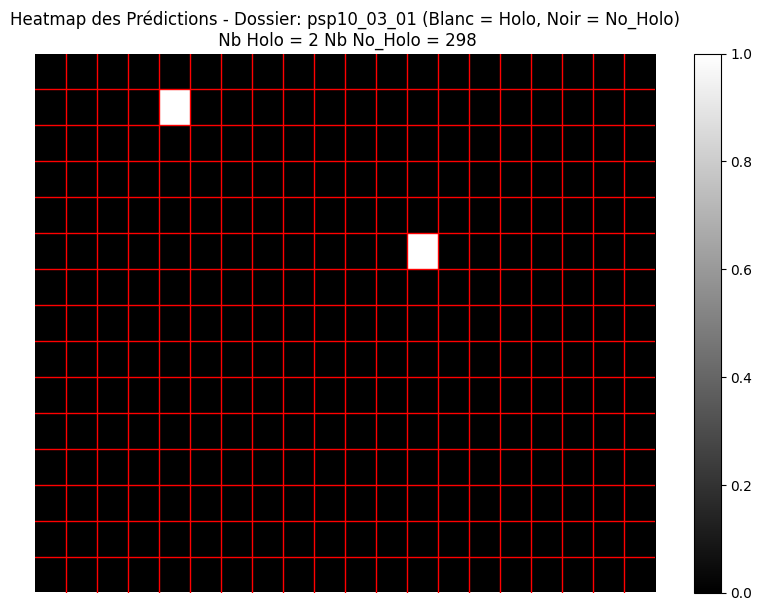

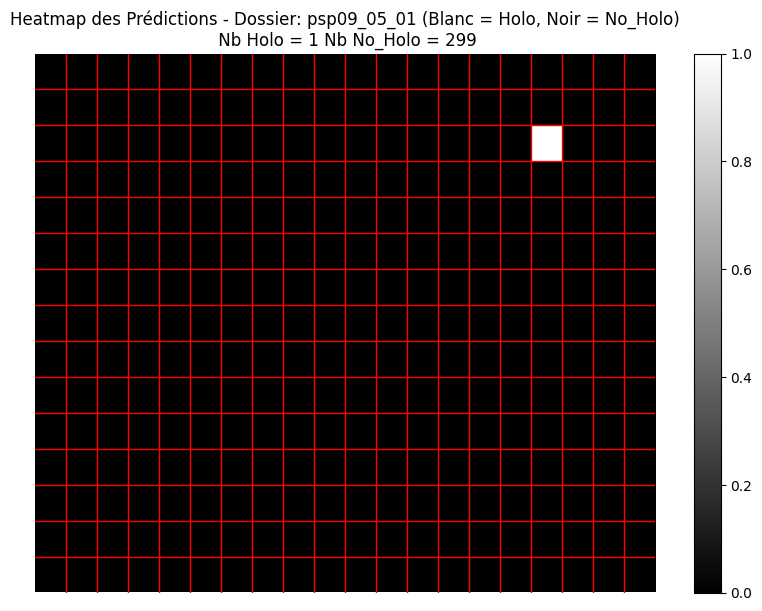

In [15]:
# Afficher toutes les heatmaps
for i, (heatmap_data, nb_holo, nb_no_holo) in enumerate(heatmaps_pseudo_holo_copy):
    plt.figure(figsize=(10, 7))  # Ajustez la taille de la figure si nécessaire
    plt.imshow(heatmap_data, cmap='binary_r', aspect='auto', vmin=0, vmax=1)

    # Ajouter des lignes rouges pour séparer les cases
    num_rows, num_cols = heatmap_data.shape
    for r in range(1, num_rows):
        plt.axhline(y=r - 0.5, color='red', linewidth=1)
    for c in range(1, num_cols):
        plt.axvline(x=c - 0.5, color='red', linewidth=1)

    plt.colorbar()
    plt.title(f'Heatmap des Prédictions - Dossier: {folders_to_process[i]} (Blanc = Holo, Noir = No_Holo)\n Nb Holo = {nb_holo} Nb No_Holo = {nb_no_holo}')
    plt.axis('off')
    plt.show()


In [16]:
print(all_nb_holo_fraud)

[6, 31, 48, 3, 11, 29, 5, 16, 0, 13, 5, 30, 2, 4, 3, 0, 15, 1, 21, 0, 7, 21, 2, 1]
